<a href="https://colab.research.google.com/github/Kevinlo937/cord-cutting-predicated/blob/main/topMSO_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports:
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
# ** Read in the csv file ** :
df = pd.read_csv('/content/ds_numService.csv', sep='^')

In [4]:
df.head()

,30天內,60天內,90天內,90天以上,平均等待天數,繳別,使用狀態_數值,產品名稱_數值
0,1,0,0,1,0.0,1,0,0
1,2,0,0,0,0.5,1,0,1
2,1,0,0,3,0.5,1,0,1
3,1,0,0,1,1.5,12,0,0
4,1,0,0,0,0.0,12,0,1


In [5]:
# Feature variables (特徵變數):
X = df.drop('使用狀態_數值', axis=1)

# Target variable (目標變數):
y = df['使用狀態_數值']

In [6]:
# Split the data into a training set and a testing set
from sklearn.model_selection import train_test_split

# 建立 training & testing sets：
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# p: 1→曼哈頓距離 / 2→歐基里德距離 / 其他: 明氏距離
clf = KNeighborsClassifier(n_neighbors=3, p=2,weights='distance')

# 訓練模型
clf.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [8]:
predictions = clf.predict(X_test)

In [9]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12631
           1       0.15      0.07      0.10      1733

    accuracy                           0.84     14364
   macro avg       0.51      0.51      0.50     14364
weighted avg       0.79      0.84      0.81     14364



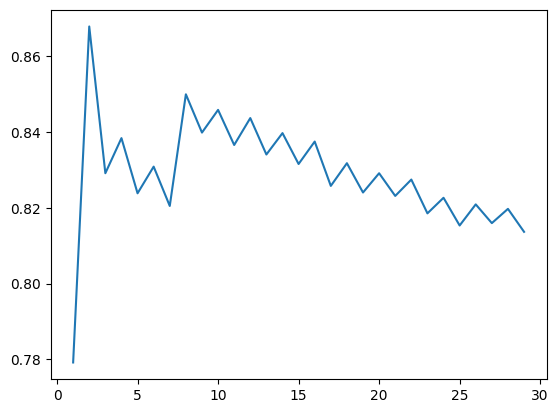

In [12]:
# Find the Best k
import matplotlib.pyplot as plt

accuracy = []
for k in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_resampled, y_train_resampled)
  y_pred = knn.predict(X_test)
  accuracy.append(metrics.accuracy_score(y_test, y_pred))
k_range = range(1,30)
plt.plot(k_range, accuracy)
plt.show()